# K Nearest Neighbours (KNN)

In [1]:
# Import potrebnih biblioteka
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Učitavanje podataka

In [2]:
# Učitati podatke iz foldera data
df = pd.read_csv("./data/carseats.csv")

## Pregled podataka


In [3]:
# Prikaži prvih nekoliko redova
print("Prvih nekoliko redova:")
display(df.head())

# Proveri osnovne informacije i tipove podataka
print("Info o kolonama:")
df.info()

Prvih nekoliko redova:


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Info o kolonama:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Kreiranje izlazne varijable

In [4]:
# Izračunaj treći kvartil za varijablu 'Sales'
sales_3Q = df['Sales'].quantile(0.75)
print(sales_3Q)

9.32


In [5]:
# Kreiraj izlaznu varijablu 'HighSales' na osnovu vrednosti varijable 'Sales'
df['HighSales'] = np.where(df['Sales'] > sales_3Q, 'Yes', 'No')
df['HighSales'].head(6)

0    Yes
1    Yes
2    Yes
3     No
4     No
5    Yes
Name: HighSales, dtype: object

In [6]:
# Ukloni varijablu 'Sales' jer je korišćena za kreiranje izlazne varijable
df.drop(columns='Sales', inplace=True)

## Standardizacija numeričkih varijabli

In [7]:
# Prikaži deskriptivnu statistiku
print(df.describe())

        CompPrice      Income  Advertising  Population       Price  \
count  400.000000  400.000000   400.000000  400.000000  400.000000   
mean   124.975000   68.657500     6.635000  264.840000  115.795000   
std     15.334512   27.986037     6.650364  147.376436   23.676664   
min     77.000000   21.000000     0.000000   10.000000   24.000000   
25%    115.000000   42.750000     0.000000  139.000000  100.000000   
50%    125.000000   69.000000     5.000000  272.000000  117.000000   
75%    135.000000   91.000000    12.000000  398.500000  131.000000   
max    175.000000  120.000000    29.000000  509.000000  191.000000   

              Age   Education  
count  400.000000  400.000000  
mean    53.322500   13.900000  
std     16.200297    2.620528  
min     25.000000   10.000000  
25%     39.750000   12.000000  
50%     54.500000   14.000000  
75%     66.000000   16.000000  
max     80.000000   18.000000  


<Axes: ylabel='CompPrice'>

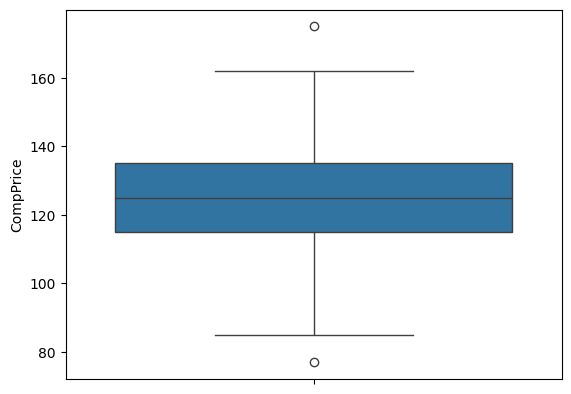

In [8]:
import seaborn as sb
# Prikaži boxplot za varijablu CompPrice
sb.boxplot(df['CompPrice'])

In [24]:
# Izaberi numeričke varijable
df.info()
numeric_vars = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
# numeric_vars = df.columns[[0, 1, 2, 3, 4, 6, 7]].tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  HighSales    400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [10]:
# Izračunaj broj autlajera za svaku numeričku varijablu
def count_outliers(variable):
    q1 = variable.quantile(0.25)
    q3 = variable.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((variable < lower) | (variable > upper)).sum()

outliers_per_column = df[numeric_vars].apply(count_outliers)
print("Broj autlajera po kolonama:\n", outliers_per_column)

Broj autlajera po kolonama:
 CompPrice      2
Income         0
Advertising    0
Population     0
Price          5
Age            0
Education      0
dtype: int64


In [11]:
from scipy.stats import shapiro
# Primeni Shapiro-Wilk test na svaku numeričku varijablu
shapiro_results = df[numeric_vars].apply(lambda x: shapiro(x)[1])
print("Shapiro-Wilk p-vrednosti:\n", shapiro_results)

Shapiro-Wilk p-vrednosti:
 CompPrice      9.771512e-01
Income         8.396355e-09
Advertising    1.491831e-17
Population     4.080853e-10
Price          3.902128e-01
Age            1.864551e-09
Education      2.426928e-13
dtype: float64


In [13]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# Izaberi numeričke varijable koje nemaju normalnu raspodelu
not_normal = ['Income', 'Advertising', 'Population', 'Age', 'Education']

# Izaberi numeričke varijable koje imaju normalnu raspodelu
normally_distributed = ['CompPrice', 'Price']

# Napravi novi DataFrame za standardizovane vrednosti
carseats_st = pd.DataFrame()

# Standardizacija varijabli koje nemaju normalnu raspodelu
robust_scaler = RobustScaler()
carseats_st[not_normal] = robust_scaler.fit_transform(df[not_normal])

# Standardizacija varijabli koje imaju normalnu raspodelu
standard_scaler = StandardScaler()
carseats_st[normally_distributed] = standard_scaler.fit_transform(df[normally_distributed])

In [14]:
# Prikaži deskriptivnu statistiku
print(carseats_st.describe())

           Income  Advertising  Population         Age   Education  \
count  400.000000   400.000000  400.000000  400.000000  400.000000   
mean    -0.007098     0.136250   -0.027592   -0.044857   -0.025000   
std      0.580021     0.554197    0.567925    0.617154    0.655132   
min     -0.994819    -0.416667   -1.009634   -1.123810   -1.000000   
25%     -0.544041    -0.416667   -0.512524   -0.561905   -0.500000   
50%      0.000000     0.000000    0.000000    0.000000    0.000000   
75%      0.455959     0.583333    0.487476    0.438095    0.500000   
max      1.056995     2.000000    0.913295    0.971429    1.000000   

          CompPrice         Price  
count  4.000000e+02  4.000000e+02  
mean   3.819167e-16 -6.217249e-17  
std    1.001252e+00  1.001252e+00  
min   -3.132482e+00 -3.881880e+00  
25%   -6.513081e-01 -6.679480e-01  
50%    1.632351e-03  5.095773e-02  
75%    6.545728e-01  6.429978e-01  
max    3.266335e+00  3.180312e+00  


## Transformacija binarnih i kategorijskih varijabli u numeričke

In [16]:
# Transformiši varijablu Urban u numeričku: "No" = 0, "Yes" = 1
carseats_st['Urban'] = df['Urban'].map({'No': 0, 'Yes': 1})

# Transformiši varijablu US u numeričku: "No" = 0, "Yes" = 1
carseats_st['US'] = df['US'].map({'No': 0, 'Yes': 1})

# Dodeli redosled vrednostima varijable ShelveLoc: "Bad" < "Medium" < "Good"
# i konvertuj ih u numeričke vrednosti
carseats_st['ShelveLoc'] = df['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})

# Dodaj izlaznu varijablu HighSales u numeričkom formatu: "No" = 0, "Yes" = 1
carseats_st['HighSales'] = df['HighSales'].map({'No': 0, 'Yes': 1})

# Prikaži strukturu transformisanog skupa podataka
print(carseats_st.info())

# Prikaži deskriptivnu statistiku
print(carseats_st.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income       400 non-null    float64
 1   Advertising  400 non-null    float64
 2   Population   400 non-null    float64
 3   Age          400 non-null    float64
 4   Education    400 non-null    float64
 5   CompPrice    400 non-null    float64
 6   Price        400 non-null    float64
 7   Urban        400 non-null    int64  
 8   US           400 non-null    int64  
 9   ShelveLoc    400 non-null    int64  
 10  HighSales    400 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 34.5 KB
None
           Income  Advertising  Population         Age   Education  \
count  400.000000   400.000000  400.000000  400.000000  400.000000   
mean    -0.007098     0.136250   -0.027592   -0.044857   -0.025000   
std      0.580021     0.554197    0.567925    0.617154    0.655132   
min     -0.99

## Podela na trening i test skupove

In [17]:
from sklearn.model_selection import train_test_split

# Podeli podatke na trening (80%) i test (20%) skup

X = carseats_st.drop(columns='HighSales')
y = carseats_st['HighSales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Kreiranje KNN klasifikatora

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Inicijalizuj KNN klasifikator sa k=5
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Kreiranje predikcija i prikaz rezultata

In [20]:
# Napravi predikcije za test skup pomoću klasifikatora knn1
y_pred1 = knn1.predict(X_test)

Matrica konfuzije:
[[59  1]
 [12  8]]


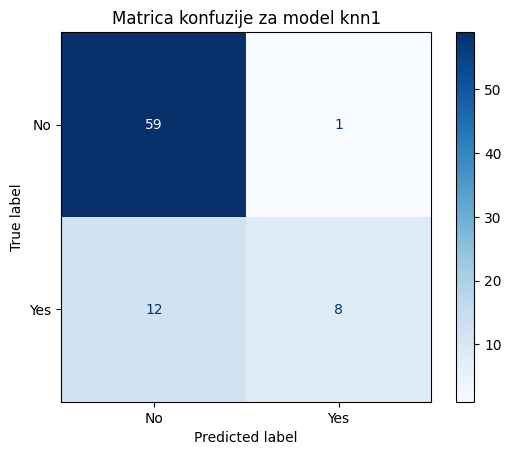

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Kreiraj matricu konfuzije za predikcije klasifikatora knn1
cm_knn1 = confusion_matrix(y_test, y_pred1)

# Prikaži matricu
print("Matrica konfuzije:")
print(cm_knn1)

# Prikaži matricu pomoću ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn1,
                              display_labels=['No', 'Yes'])

disp.plot(cmap=plt.cm.Blues)

plt.title("Matrica konfuzije za model knn1")
plt.show()

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Funkcija za izračunavanje evaluacionih metrika
def compute_eval_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=0)
    recall = recall_score(y_true, y_pred, pos_label=0)
    f1 = f1_score(y_true, y_pred, pos_label=0)
    return {
        'accuracy': accuracy,
        'precision': float(precision),
        'recall': float(recall),
        'f1': float(f1)
    }

In [23]:
# Izračunaj evaluacione metrike za predikcije klasifikatora knn1
knn_eval1 = compute_eval_metrics(y_test, y_pred1)
print(knn_eval1)

{'accuracy': 0.8375, 'precision': 0.8309859154929577, 'recall': 0.9833333333333333, 'f1': 0.9007633587786259}


## Pronalaženje optimalne vrednosti za `k` pomoću 10-struke cross-validacije

In [25]:
from sklearn.model_selection import GridSearchCV

# Inicijalizuj KNN klasifikator
knn = KNeighborsClassifier()

# Definiši opseg vrednosti za broj suseda k (neparni brojevi od 3 do 25)
param_grid = {'n_neighbors': list(range(3, 26, 2))}

# Postavi GridSearch sa 10-strukom stratifikovanom kros-validacijom i metrikom tačnosti
cv = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  cv=10,
                  scoring='accuracy',
                  verbose = 1,
                  n_jobs = -1)

# Pokreni pretragu hiperparametra (k) na trening skupu
cv.fit(X_train, y_train)

# Prikaži optimalnu vrednost za k
best_k = cv.best_params_['n_neighbors']
print("Optimalna vrednost za k:", best_k)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Optimalna vrednost za k: 7


In [26]:
# Kreiraj novi KNN klasifikator sa optimalnim brojem suseda
knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
# Kreiraj predikcije za test skup pomoću klasifikatora knn2
y_pred2 = knn2.predict(X_test)

In [28]:
# Kreiraj matricu konfuzije za predikcije klasifikatora knn2
cm_knn2 = confusion_matrix(y_test, y_pred2)

# Prikaži matricu pomoću ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn2,
                              display_labels=['No', 'Yes'])

In [29]:
# Izračunaj evaluacione metrike za predikcije klasifikatora knn2
knn2_eval = compute_eval_metrics(y_test, y_pred2)
print(knn2_eval)

{'accuracy': 0.8625, 'precision': 0.8450704225352113, 'recall': 1.0, 'f1': 0.916030534351145}


In [30]:
# Uporedi evaluacione metrike za predikcije klasifikatora knn1 i knn2
eval_df = pd.DataFrame([knn_eval1,knn2_eval],index=['Knn1','Knn2'])
print(eval_df)

      accuracy  precision    recall        f1
Knn1    0.8375   0.830986  0.983333  0.900763
Knn2    0.8625   0.845070  1.000000  0.916031
